# Week 8 練習と総合問題解答

In [ ]:
# 途中で使用するため、あらかじめ読み込んでおいてください。
# データ加工・処理・分析ライブラリ
import numpy as np
import numpy.random as random
import pandas as pd

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機械学習ライブラリ
import sklearn

# 小数第３位まで表示
%precision 3

'%.3f'

#### <練習問題 8-1>
乳がんデータに対して、決定木以外のモデル（ロジスティック回帰分析など）を構築し、それぞれのモデルの評価スコアをk分割交差検証を使って取得しましょう。

In [ ]:
# 解答
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()
model = LogisticRegression(random_state=0)
scores = cross_val_score(model, cancer.data, cancer.target, cv=5)

print('Cross validation scores:{}'.format(scores))
print('Cross validation scores:{:.2f}+-{:.2f}'.format(scores.mean(), scores.std()))

Cross validation scores:[0.93  0.939 0.956 0.947 0.947]
Cross validation scores:0.94+-0.01


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

#### <練習問題 8-2>
乳がんデータに対して、決定木を使ってグリッドサーチと交差検証を実施してください。なお、決定木のパラメータは、木の深さとリーフに含まれるべき最小サンプル数、具体的には、`param_grid = {'max_depth': [2, 3, 4, 5], 'min_samples_leaf': [2, 3, 4, 5]}`と設定してください。

In [ ]:
# 解答
from sklearn.model_selection import GridSearchCV
from sklearn.tree import  DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# データの読み込み
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=0)

# パラメータの設定
param_grid = {'max_depth': [2, 3, 4, 5], 'min_samples_leaf': [2, 3, 4, 5]}
model = DecisionTreeClassifier(random_state=0)
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train,y_train)

print('テストデータにおけるスコア:{:.2f}'.format(grid_search.score(X_test, y_test)))
print('スコアがベストなときのパラメータ:{}'.format(grid_search.best_params_))
print('スコアがベストなときのross-validation score:{:.2f}'.format(grid_search.best_score_))

テストデータにおけるスコア:0.92
スコアがベストなときのパラメータ:{'max_depth': 4, 'min_samples_leaf': 5}
スコアがベストなときのross-validation score:0.94


#### <練習問題 8-3>
<練習問題 8-2>で使用した乳がんデータに対して、サポートベクターマシン以外のモデル（ロジスティック回帰分析など）を構築し、混同行列を作ってください。また、テストデータにおける正解率、適合率、再現率、F1値の値をScikit-learnの関数を使って取得して下さい。

In [ ]:
# 解答
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=0)

model = LogisticRegression(random_state=0)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print('Confution matrix:\n{}'.format(confusion_matrix(y_test, y_pred)))
print('正解率:{:.3f}'.format(accuracy_score(y_test, y_pred)))
print('適合率:{:.3f}'.format(precision_score(y_test, y_pred)))
print('再現率:{:.3f}'.format(recall_score(y_test, y_pred)))
print('F1値:{:.3f}'.format(f1_score(y_test, y_pred)))

Confution matrix:
[[49  4]
 [ 5 85]]
正解率:0.937
適合率:0.955
再現率:0.944
F1値:0.950


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### <練習問題 8-4>
以前練習問題で使用したアヤメのデータ（iris）に対して、目的変数をiris.targetとしたSVCを用いた多クラス分類のモデルを作り、そのROC曲線とAUCを計算してください。多クラス分類のモデルを作るには、`sklearn.multiclass`モジュールの`OneVsRestClassifier`クラスを用いてください。

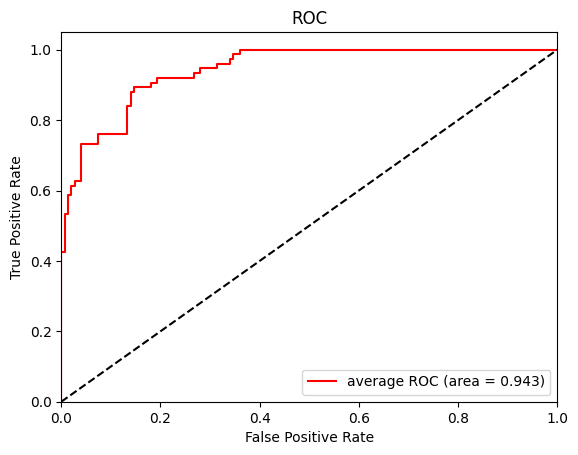

In [ ]:
# 解答
#参照URL：http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

#　データの読み込み
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 正解データのone-hot化
y = label_binarize(y, classes=[0, 1, 2])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# multi-class classification model
model = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True, random_state=0))
y_score = model.fit(X_train, y_train).predict_proba(X_test)

# 3つそれぞれのクラスについて、1次元のデータにして、ROC曲線、AUCを算出する
fpr, tpr, _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc = auc(fpr, tpr)

# グラフ化する
plt.figure()
plt.plot(fpr, tpr, color='red', label='average ROC (area = {:.3f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc='best')

print("ROC AUC:", roc_auc)

#### <練習問題 8-5>
アヤメのデータセットを対象にバギングを使って、目的変数（`iris.target`）を予測するモデルを構築し検証しましょう。また、パラメータとして何を調整しますか。調べて実行してみましょう。

In [ ]:
# 解答

# 必要なライブラリ等の読み込み
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# アイリスのデータの読み込み
iris = load_iris()

# 訓練データとテストデータにわける
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify = iris.target, random_state=0)

# バギングのモデル生成
model = BaggingClassifier(
            KNeighborsClassifier(),
            n_estimators=10,
            max_samples=0.5,
            max_features=0.5)

# モデルのフィッティング
model.fit(X_train, y_train)

# それぞれのスコア
print('正解率(train):{} {:.3f}'.format(model.__class__.__name__ , model.score(X_train, y_train)))
print('正解率(test):{} {:.3f}'.format(model.__class__.__name__ , model.score(X_test, y_test)))

正解率(train):BaggingClassifier 0.946
正解率(test):BaggingClassifier 1.000


#### <練習問題 8-6>
アヤメのデータセットを対象にブースティング（`AdaBoostRegressor`クラス）を使って、目的変数（`iris.target`）を予測するモデルを構築し検証しましょう。また、パラメータとして何を調整しますか。調べて実行してみましょう。

In [ ]:
# 解答
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify = iris.target, random_state=0)

model = AdaBoostClassifier(n_estimators=50, learning_rate=1.0)
model.fit(X_train, y_train)
print('正解率(train):{} {:.3f}'.format(model.__class__.__name__ , model.score(X_train, y_train)))
print('正解率(test):{} {:.3f}'.format(model.__class__.__name__ , model.score(X_test, y_test)))

正解率(train):AdaBoostClassifier 0.955
正解率(test):AdaBoostClassifier 0.947


#### <練習問題 8-7>
アヤメのデータを対象にランダムフォレストと勾配ブースティングを使って、目的変数（`iris.target`）を予測するモデルを構築し検証しましょう。また、パラメータとして何を調整しますか。調べて実行してみましょう。

In [ ]:
# 解答
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify = iris.target, random_state=0)

models = {
    'RandomForest': RandomForestClassifier(random_state=0),
    'GradientBoost': GradientBoostingClassifier(random_state=0)
}

scores = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    scores[(model_name, 'train_score')] = model.score(X_train, y_train)
    scores[(model_name, 'test_score')] = model.score(X_test, y_test)

pd.Series(scores).unstack()

,test_score,train_score
GradientBoost,0.973684,1.0
RandomForest,0.947368,1.0


## 8.5 総合問題

### ■総合問題8-1 教師あり学習の用語（2）
略

### ■総合問題8-2 交差検証

乳がんデータセットを使って、予測モデル（ロジスティック回帰、SVM、決定木、k-NN、ランダムフォレスト、勾配ブースティング）を構築し、交差検証（5分割）により、どのモデルが一番良いか確認してください。

In [ ]:
# 解答
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import  DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=0)

models = {
    'KNN': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(random_state=0),
    'DecisionTree': DecisionTreeClassifier(random_state=0),
    'SVM': LinearSVC(random_state=0),
    'RandomForest': RandomForestClassifier(random_state=0),
    'GradientBoost': GradientBoostingClassifier(random_state=0)
}

scores = {}
for model_name, model in models.items():
    scores[(model_name, 'cross_val_score')] = cross_val_score(model, X_train, y_train, cv=5).mean()

pd.Series(scores).unstack()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

,cross_val_score
DecisionTree,0.924843
GradientBoost,0.967168
KNN,0.938960
LogisticRegression,0.941313
RandomForest,0.957811
SVM,0.795513


今回は、勾配ブースティングが交差検証スコアがもっとも高く、0.967となりました。